<a href="https://www.kaggle.com/code/nickrod068/ai4all-final-project-group-19?scriptVersionId=126463977" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superheroes-nlp-dataset/superheroes_nlp_dataset.csv


In [2]:
# Read file
data = pd.read_csv('/kaggle/input/superheroes-nlp-dataset/superheroes_nlp_dataset.csv')

# Display data (looking for categories)
print(data.head(10))

                name               real_name               full_name  \
0            3-D Man     Delroy Garrett, Jr.     Delroy Garrett, Jr.   
1      514A (Gotham)             Bruce Wayne                     NaN   
2             A-Bomb  Richard Milhouse Jones  Richard Milhouse Jones   
3                 Aa                      Aa                     NaN   
4         Aaron Cash              Aaron Cash              Aaron Cash   
5       Aayla Secura            Aayla Secura                     NaN   
6         Abe Sapien          Abraham Sapien          Abraham Sapien   
7           Abin Sur                     NaN                     NaN   
8        Abomination            Emil Blonsky            Emil Blonsky   
9  Abra Kadabra (CW)                 Unknown                 Unknown   

  overall_score                                       history_text  \
0             6  Delroy Garrett, Jr. grew up to become a track ...   
1            10  He was one of the many prisoners of Indian Hil... 

In [3]:
print(data.columns)

Index(['name', 'real_name', 'full_name', 'overall_score', 'history_text',
       'powers_text', 'intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score', 'superpowers',
       'alter_egos', 'aliases', 'place_of_birth', 'first_appearance',
       'creator', 'alignment', 'occupation', 'base', 'teams', 'relatives',
       'gender', 'type_race', 'height', 'weight', 'eye_color', 'hair_color',
       'skin_color', 'img', 'has_electrokinesis', 'has_energy_constructs',
       'has_mind_control_resistance', 'has_matter_manipulation',
       'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing',
       'has_dimensional_travel', 'has_element_control', 'has_size_changing',
       'has_fire_resistance', 'has_fire_control', 'has_dexterity',
       'has_reality_warping', 'has_illusions', 'has_energy_beams',
       'has_peak_human_condition', 'has_shapeshifting', 'has_heat_resistance',
       'has_jump', 'has_self-sustenance', 'ha

In [4]:
# Data cleaning
# Extract name for labeling
superhero_names = data['name']

# Extract relevant attributes
attributes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']
data = data[attributes]

In [5]:
# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
# Computing the correlation matrix between attributes
corr_matrix = data.corr()

# Printing the correlation matrix
print(corr_matrix)

                    intelligence_score  strength_score  speed_score  \
intelligence_score            1.000000        0.308083     0.447139   
strength_score                0.308083        1.000000     0.690237   
speed_score                   0.447139        0.690237     1.000000   
durability_score              0.463368        0.771473     0.721096   
power_score                   0.503635        0.592143     0.633234   
combat_score                  0.661067        0.376496     0.521626   

                    durability_score  power_score  combat_score  
intelligence_score          0.463368     0.503635      0.661067  
strength_score              0.771473     0.592143      0.376496  
speed_score                 0.721096     0.633234      0.521626  
durability_score            1.000000     0.701052      0.520932  
power_score                 0.701052     1.000000      0.518055  
combat_score                0.520932     0.518055      1.000000  


In [7]:
# Implement k-means clustering
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [8]:
# Label superheroes based on cluster
data['cluster'] = kmeans.labels_

In [9]:
# Determining the most powerful superhero in each cluster
centroids = kmeans.cluster_centers_
strongest_superheroes = []

attributes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']

for i in range(k):
    cluster_data = data[data['cluster'] == i].copy()
    cluster_data.loc[:, 'total_score'] = cluster_data[attributes].sum(axis=1)
    strongest_superhero = cluster_data.loc[cluster_data['total_score'].idxmax()]
    strongest_superheroes.append(strongest_superhero)

strongest_superheroes = pd.DataFrame(strongest_superheroes)

In [10]:
# Assigning stored names to superheroes (w/o this step it just labels superhero as a number)
strongest_superheroes = pd.DataFrame(strongest_superheroes)
strongest_superheroes['name'] = superhero_names[strongest_superheroes.index]

In [11]:
# Determining which superhero is most likely to win in a fight
strongest_superheroes['total_score'] = strongest_superheroes[attributes].sum(axis=1)
winner = strongest_superheroes.loc[strongest_superheroes['total_score'].idxmax()]

In [12]:
# Console log most likely to win
print("The superhero most likely to win in a fight is: ", winner['name'])

The superhero most likely to win in a fight is:  Abraxas


In [13]:
# PCA implementation setup (Cluster is 4-dimensional reduced to 2-dimensional for data display)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

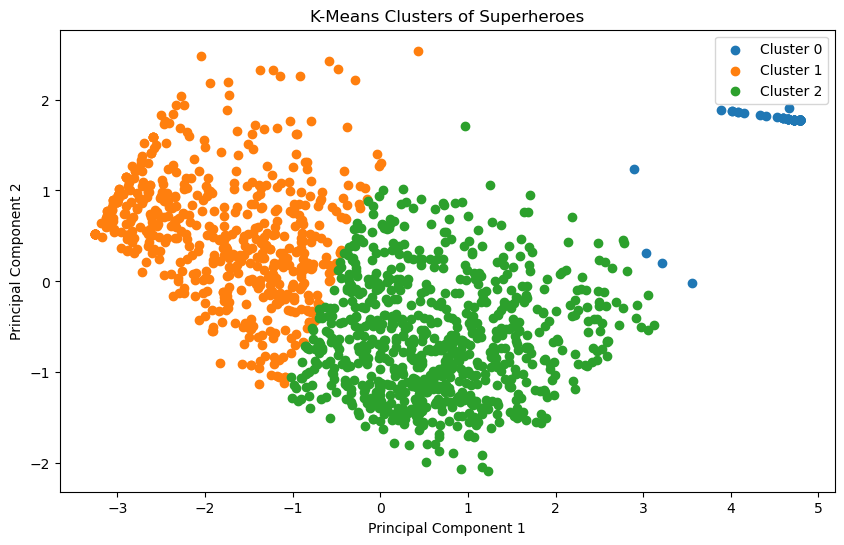

In [14]:
# Code for displaying K-means cluster 
plt.figure(figsize=(10, 6))

for i in range(k):
    cluster_data = data_pca[data['cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('K-Means Clusters of Superheroes')
plt.show()

In [15]:
# Breaking down PCA labels and trying to figure out data correlation to strongest superhero output

# Extract the principal components
principal_components = pca.components_

# Display the principal components
for i, component in enumerate(principal_components):
    print(f"Principal Component {i+1}:")
    for attribute, weight in zip(attributes, component):
        print(f"  {attribute}: {weight:.2f}")

Principal Component 1:
  intelligence_score: -0.35
  strength_score: -0.41
  speed_score: -0.43
  durability_score: -0.45
  power_score: -0.42
  combat_score: -0.38
Principal Component 2:
  intelligence_score: -0.63
  strength_score: 0.47
  speed_score: 0.20
  durability_score: 0.25
  power_score: 0.05
  combat_score: -0.52


In [16]:
# Compute the correlation matrix between attributes
corr_matrix = data.corr()

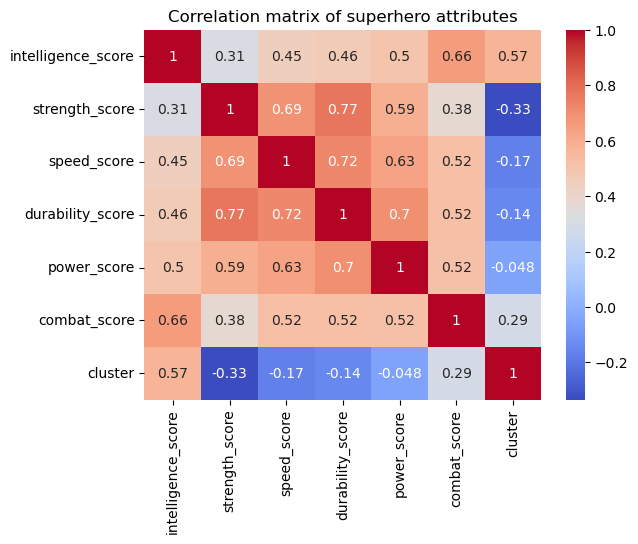

In [17]:
# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of superhero attributes')
plt.show()

In [18]:
# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
superheroes_tsne = tsne.fit_transform(data)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


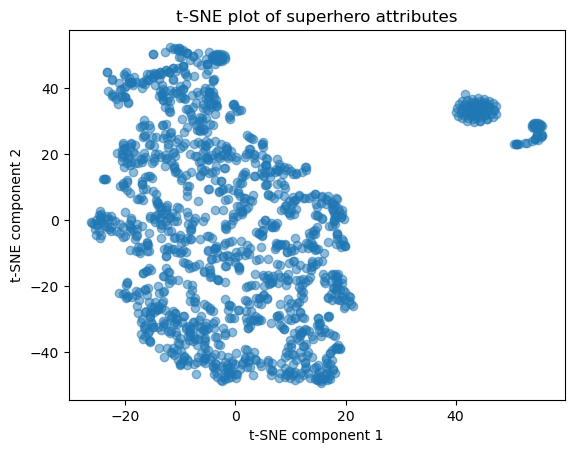

In [19]:
# Create a scatter plot of the t-SNE embeddings
plt.scatter(superheroes_tsne[:, 0], superheroes_tsne[:, 1], alpha=0.5)
plt.title('t-SNE plot of superhero attributes')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

In [20]:
# Iteration 2.0
# Read file
data = pd.read_csv('/kaggle/input/superheroes-nlp-dataset/superheroes_nlp_dataset.csv')

# Display data (looking for categories)
print(data.head(10))

                name               real_name               full_name  \
0            3-D Man     Delroy Garrett, Jr.     Delroy Garrett, Jr.   
1      514A (Gotham)             Bruce Wayne                     NaN   
2             A-Bomb  Richard Milhouse Jones  Richard Milhouse Jones   
3                 Aa                      Aa                     NaN   
4         Aaron Cash              Aaron Cash              Aaron Cash   
5       Aayla Secura            Aayla Secura                     NaN   
6         Abe Sapien          Abraham Sapien          Abraham Sapien   
7           Abin Sur                     NaN                     NaN   
8        Abomination            Emil Blonsky            Emil Blonsky   
9  Abra Kadabra (CW)                 Unknown                 Unknown   

  overall_score                                       history_text  \
0             6  Delroy Garrett, Jr. grew up to become a track ...   
1            10  He was one of the many prisoners of Indian Hil... 

In [21]:
# remove rows with NaN values
data = data.dropna()

# extract rows that contain an overall score > 20
data = data[pd.to_numeric(data['overall_score'], errors='coerce') > 20]


In [22]:
print(data.head(10))

                          name        real_name                  full_name  \
284   Champion Of The Universe  Tryco Slatterus            Tryco Slatterus   
416                   Dormammu         Dormammu                   Dormammu   
527               Golden Ninja   Lloyd Garmadon  LLoyd Montgomery Garmadon   
590                    Hellboy    Anung Un Rama              Anung Un Rama   
616                       Hulk     Bruce Banner        Robert Bruce Banner   
630              Immortal Hulk     Bruce Banner        Robert Bruce Banner   
980                      Omega        The Omega                      Omega   
1174             Silver Surfer      Norrin Radd                Norrin Radd   
1244  Strange Visitor Superman           Kal-El          Clark Joseph Kent   
1270                    Thanos           Thanos                     Thanos   

     overall_score                                       history_text  \
284             22  Early Years Like all the Elders of the Univers..

In [23]:
# Data cleaning
# Extract name for labeling
superhero_names = data['name']

# Extract relevant attributes
attributes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']
data = data[attributes]

In [24]:
# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [25]:
# Computing the correlation matrix between attributes
corr_matrix = data.corr()

# Printing the correlation matrix
print(corr_matrix)

                    intelligence_score  strength_score  speed_score  \
intelligence_score            1.000000        0.141780     0.362506   
strength_score                0.141780        1.000000     0.755929   
speed_score                   0.362506        0.755929     1.000000   
durability_score              0.060418       -0.131716    -0.039827   
power_score                        NaN             NaN          NaN   
combat_score                  0.022447       -0.244677    -0.493223   

                    durability_score  power_score  combat_score  
intelligence_score          0.060418          NaN      0.022447  
strength_score             -0.131716          NaN     -0.244677  
speed_score                -0.039827          NaN     -0.493223  
durability_score            1.000000          NaN      0.449042  
power_score                      NaN          NaN           NaN  
combat_score                0.449042          NaN      1.000000  


In [26]:
# Implement k-means clustering
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [27]:
# Label superheroes based on cluster
data['cluster'] = kmeans.labels_

In [28]:
# Determining the most powerful superhero in each cluster
centroids = kmeans.cluster_centers_
strongest_superheroes = []

attributes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']

for i in range(k):
    cluster_data = data[data['cluster'] == i].copy()
    cluster_data.loc[:, 'total_score'] = cluster_data[attributes].sum(axis=1)
    strongest_superhero = cluster_data.loc[cluster_data['total_score'].idxmax()]
    strongest_superheroes.append(strongest_superhero)

strongest_superheroes = pd.DataFrame(strongest_superheroes)

In [29]:
# Assigning stored names to superheroes (w/o this step it just labels superhero as a number)
strongest_superheroes = pd.DataFrame(strongest_superheroes)
strongest_superheroes['name'] = superhero_names[strongest_superheroes.index]

In [30]:
# Determining which superhero is most likely to win in a fight
strongest_superheroes['total_score'] = strongest_superheroes[attributes].sum(axis=1)
winner = strongest_superheroes.loc[strongest_superheroes['total_score'].idxmax()]

In [31]:
# Console log most likely to win
print("The superhero most likely to win in a fight is: ", winner['name'])

The superhero most likely to win in a fight is:  Golden Ninja


In [32]:
# PCA implementation setup (Cluster is 4-dimensional reduced to 2-dimensional for data display)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

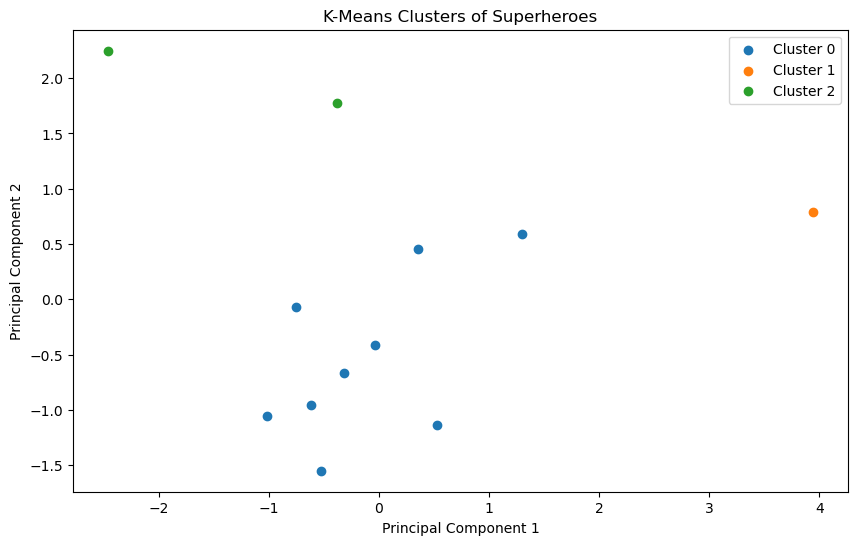

In [33]:
# Code for displaying K-means cluster 
plt.figure(figsize=(10, 6))

for i in range(k):
    cluster_data = data_pca[data['cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('K-Means Clusters of Superheroes')
plt.show()

In [34]:
# Breaking down PCA labels and trying to figure out data correlation to strongest superhero output

# Extract the principal components
principal_components = pca.components_

# Display the principal components
for i, component in enumerate(principal_components):
    print(f"Principal Component {i+1}:")
    for attribute, weight in zip(attributes, component):
        print(f"  {attribute}: {weight:.2f}")

Principal Component 1:
  intelligence_score: -0.23
  strength_score: -0.54
  speed_score: -0.62
  durability_score: 0.24
  power_score: -0.00
  combat_score: 0.46
Principal Component 2:
  intelligence_score: -0.52
  strength_score: -0.18
  speed_score: -0.24
  durability_score: -0.65
  power_score: 0.00
  combat_score: -0.46


In [35]:
# Compute the correlation matrix between attributes
corr_matrix = data.corr()

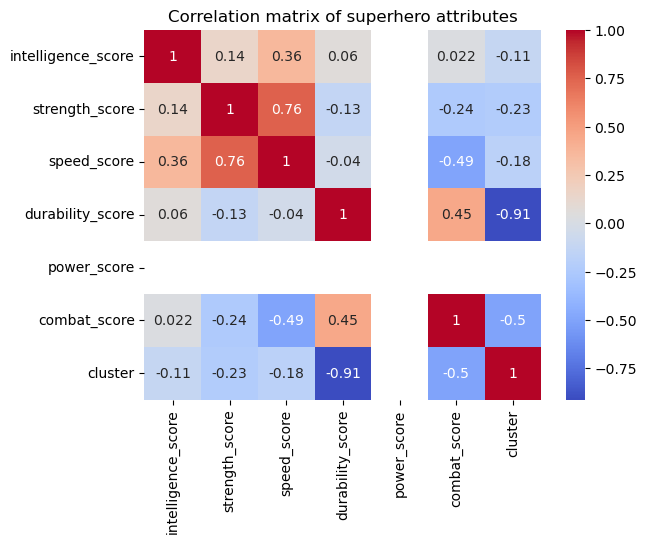

In [36]:
# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of superhero attributes')
plt.show()

In [37]:
# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
superheroes_tsne = tsne.fit_transform(data)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


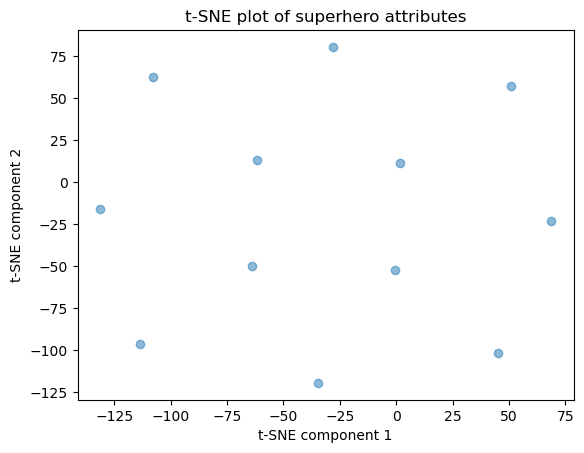

In [38]:
# Create a scatter plot of the t-SNE embeddings
plt.scatter(superheroes_tsne[:, 0], superheroes_tsne[:, 1], alpha=0.5)
plt.title('t-SNE plot of superhero attributes')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()